### MACHINE LEARNING
Addestramento del primo algoritmo di machine learning

In [1]:
import pandas as pd
import numpy as np

## 1. Scegliere i dati

In [2]:
nomefile = './marziani.csv'
data = pd.read_csv(nomefile)
print(data.head()) # per farsi un'idea del contenuto
print(">>colonne: ", data.columns) # per vedere le intestazioni di colonna
print(">>tipi\n",data.dtypes) # per vedere i tipi

  specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65
>>colonne:  Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')
>>tipi
 specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


## 2. Pulizia e preparazione dei dati

In [3]:
# serve per vedere il numero di valori null per colonne

data.isnull().sum()

specie       0
colore       7
n_arti       6
peso         0
altezza      5
larghezza    3
dtype: int64

In [4]:
# serve per vedere le colonne che hanno valori null e quanti c'è ne sono

cols_with_missing = [col for col in data.columns if data[col].isnull().sum()]
cols_with_missing = (data.isnull().sum())
print(cols_with_missing[cols_with_missing > 0])

colore       7
n_arti       6
altezza      5
larghezza    3
dtype: int64


### Analizzare i dati

In [5]:
print(">>Specie")
print(data.specie.unique()) # quali sono le specie
print(">>Describe")
print(data['specie'].describe()) # quanti campioni ci sono

>>Specie
['Robby' 'Simmy']
>>Describe
count      2000
unique        2
top       Simmy
freq       1000
Name: specie, dtype: object


In [6]:
print(">> Robby\n",data[data['specie'] == 'Robby'].describe())
print(">> Simmy\n",data[data['specie'] == 'Simmy'].describe())

>> Robby
            n_arti         peso     altezza   larghezza
count  999.000000  1000.000000  996.000000  999.000000
mean    24.637638     3.500900   17.518082   84.719429
std      2.899248     0.489139    4.227621   11.456814
min     20.000000     2.130000    3.170000   44.700000
25%     22.000000     3.170000   14.740000   77.045000
50%     25.000000     3.490000   17.330000   84.890000
75%     27.000000     3.830000   20.307500   92.510000
max     29.000000     5.050000   29.400000  117.450000
>> Simmy
            n_arti         peso     altezza   larghezza
count  995.000000  1000.000000  999.000000  998.000000
mean    24.544724     4.490280   32.769620   70.241653
std      2.883513     0.518585    5.755694    3.345319
min     20.000000     2.850000   15.630000   59.440000
25%     22.000000     4.147500   29.070000   68.000000
50%     25.000000     4.505000   32.640000   70.330000
75%     27.000000     4.850000   36.475000   72.610000
max     29.000000     6.110000   49.750000   

In [7]:
for specie in data.specie.unique(): # per ogni specie
    dati = data[data['specie'] == specie]
    print('>>', specie)
    for x in data.columns[1:]: # esclusa la colonna specie
        print(dati[x].describe() ) # per avere statistiche sui dati

>> Robby
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%       92.510000
max      117.450000
Name: larghezza, dtype: float64
>> Simmy
count       998
unique        3
top       rosso
freq        339
Name: colore, dtype: object
count    995.000000
mean      24.544724


### Rendiamo numeriche le label

#### Rendere numeriche le label
Ad ogni colore associo un numero:
- blu 0
- rosso 1
- viola 2

In [8]:
# Ad ogni colore associo un numero

colori = np.sort(data['colore'].dropna().unique()) # colori in ordine alfabetico

print(colori)

d = data.copy() # fa una copia dei dati originali
for k, colore in enumerate(colori): # sostituisce ogni colore con l'indice
    d['colore'].replace(colore, k, inplace = True)

print(d.head())

['blu' 'rosso' 'viola']
  specie  colore  n_arti  peso  altezza  larghezza
0  Robby     2.0    20.0  3.87    14.77      73.22
1  Robby     2.0    27.0  3.15    28.19      88.44
2  Robby     2.0    25.0  4.35    12.05      76.74
3  Robby     0.0    20.0  3.76     9.90      81.37
4  Robby     0.0    28.0  2.86    19.87      84.65


In [9]:
print(data['colore'].unique()) # senza eliminare i dati mancanti

['viola' 'blu' 'rosso' nan]


### Rappresentazione dei dati

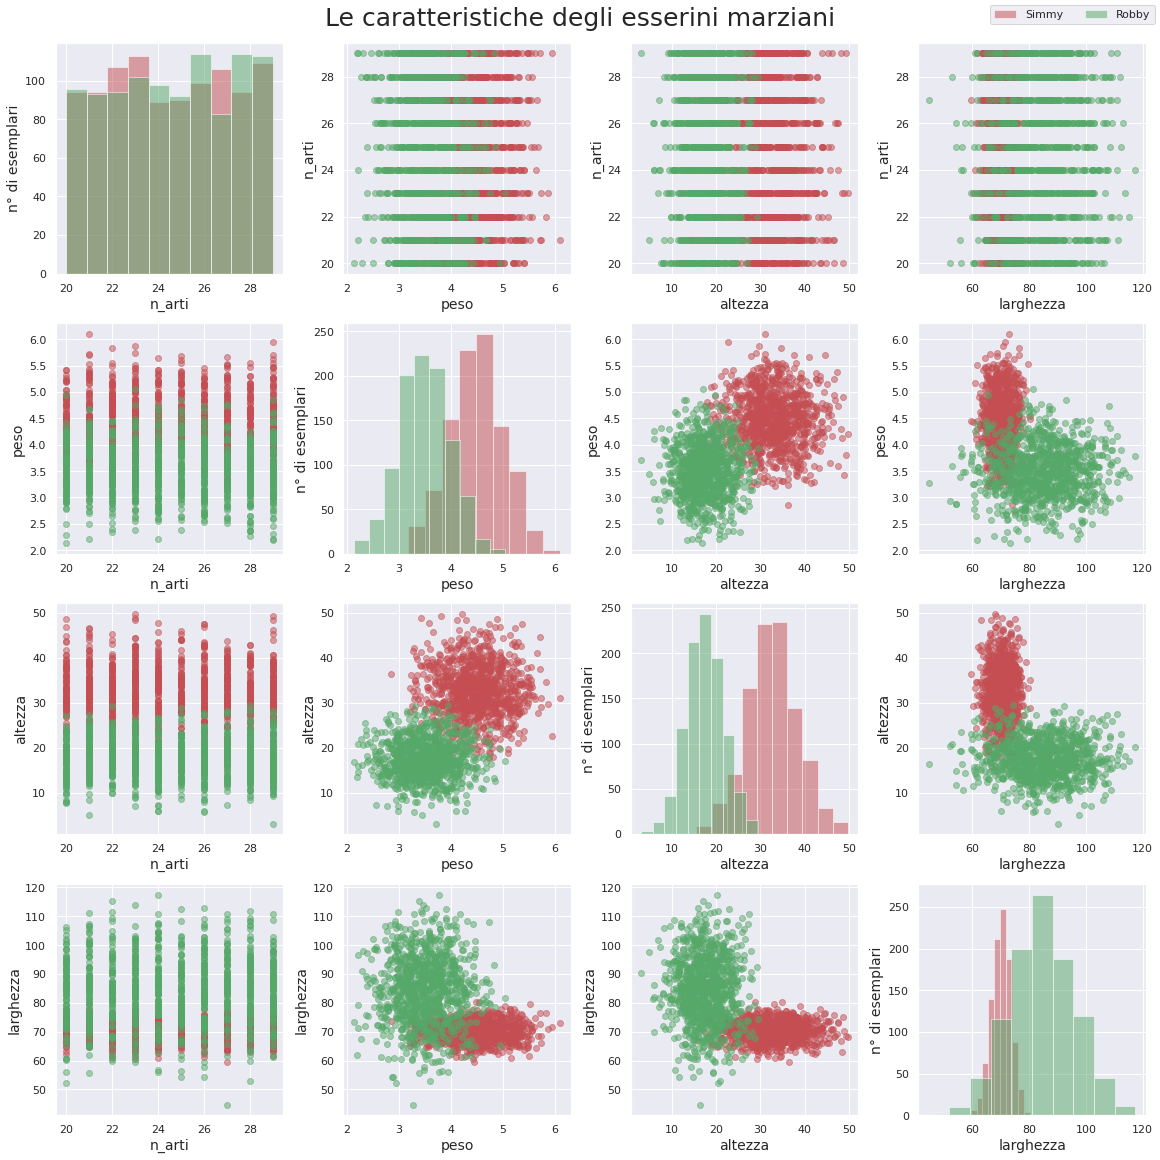

In [45]:
caratteristiche = ['n_arti', 'peso', 'altezza', 'larghezza']
n = len(caratteristiche)
fig, axs = plt.subplots(n, n, figsize=(16,16), constrained_layout=True)
for j, dato_y in enumerate(caratteristiche):
    for i, dato_x in enumerate(caratteristiche):
        maschera_simmy = data['specie']=="Simmy"
        maschera_robby = data['specie']=="Robby"
        if i!=j:
            axs[j,i].scatter(data[maschera_simmy][dato_x], 
                       data[maschera_simmy][dato_y], c="r", label="Simmy", alpha=0.5)
            axs[j,i].scatter(data[maschera_robby][dato_x], 
                       data[maschera_robby][dato_y], c="g", label="Robby", alpha=0.5)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel(dato_y, fontsize=14)
        else:
            axs[j,i].hist(data[maschera_simmy][dato_x], bins=10,
                        color="r", label="Simmy", alpha=0.5)
            axs[j,i].hist(data[maschera_robby][dato_x], bins=10,
                        color="g", label="Robby", alpha=0.5)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel("n° di esemplari", fontsize=14)
    
fig.suptitle('Le caratteristiche degli esserini marziani', fontsize=25)
fig.legend(labels=["Simmy","Robby"], ncol=2)
plt.show()

### Eliminiamo i dati mancanti

In [11]:
# Colonne con dati mancanti
cols_with_missing = [col for col in d.columns if d[col].isnull().sum()]
print(cols_with_missing)

# caratteristiche scelte per la classificazione
cols_selected = ['peso','altezza', 'larghezza']

# si eliminano le righe con dati mancanti solo nelle colonne selezionate
d = data.dropna(axis='index', subset = cols_selected)
print(d.shape)

# Colonne rimanenti con dati mancanti
print([col for col in d.columns if d[col].isnull().sum()])

['colore', 'n_arti', 'altezza', 'larghezza']
(1992, 6)
['colore', 'n_arti']


Le feature che sono state scelte non sono a caso. Solitamente le scelgono chi conosce bene il problema e nel caso non ci sia nessuno il metodo che va per la maggiore è quello di provare e vedere quale modello va meglio.

### Suddividiamo il dataframe negli insiemi X e y , tenendo le caratteristiche scelte

In [12]:
X = d[cols_selected] #['peso','altezza','larghezza']
y = d['specie']
print(X.head())
print(y.head())

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65
0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object


## 3. Suddividere i dati in insieme di training e di test TRAIN_TEST_SPLIT

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.head())
print("Numero di campioni in X train: ",X_train.shape[0])
print(y_train.value_counts()) # quanti valori per ogni specie
print(y_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero di campioni in X train:  1394
Simmy    710
Robby    684
Name: specie, dtype: int64
1853    Simmy
486     Robby
846     Robby
376     Robby
580     Robby
Name: specie, dtype: object


**train_test_split** è una funzione utile per l'addestramento di scikitlearn.
Questa funzione permette di separare X e y in train e test. È molto semplice perché come parametri desidera `X`, `y` e la `size della X e y del train` (da 0 a 1). `random_state` è il seme, significa che ogni volta che eseguo ottengo sempre la stessa suddivisione, se lo togliessi ogni volta sarebbe diverso.


### Standarizzazione

In [37]:
# per visualizzare i dati con solo 3 decimali
pd.options.display.float_format = '{:.3f}'.format

m = X_train.mean()
print(f">>Media: \n{m}")
s = X_train.std()
print(f">>Deviazione standard: \n{s}")

X_train_std = ((X_train-m)/s) # normalizzazione del training set
print(f">>X train Normalizzato \n {X_train_std.describe()}")

>>Media: 
peso         3.995
altezza     25.276
larghezza   77.389
dtype: float64
>>Deviazione standard: 
peso         0.708
altezza      9.173
larghezza   10.984
dtype: float64
>>X train Normalizzato 
           peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean    -0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444


NB: Dopo la normalizzazione la distribuzione dei dati rimane invariata, cambia solo l'intervallo dei valori.

In [38]:
X_test_std = ((X_test-m)/s) # normalizziamo
print(f">>X test Normalizzato \n {X_test_std.describe()}")

pd.options.display.float_format = None # ripristina la visualizzazione di default

>>X test Normalizzato 
          peso  altezza  larghezza
count 598.000  598.000    598.000
mean   -0.001   -0.048      0.026
std     0.988    0.988      1.035
min    -2.635   -1.968     -2.976
25%    -0.742   -0.876     -0.719
50%    -0.014   -0.175     -0.340
75%     0.738    0.740      0.701
max     2.380    2.668      3.647


## 4. Scegliere il modello da utilizzare

In [39]:
# questa è una rete neurale a più strati, in questo caso è una rete neurale formata 100 neuroni
# noi abbiamo in input 3 features: peso, altezza e larghezza

# In questo caso ci sono 2 strati da 100 neuroni ed ogni input entra dentro tutti i neuroni

# hidden_layer_sizes --> riguarda il numero di strati e il numero di neuroni
# random_state --> è il seme del generatore di numeri casuali
# max_iter --> è il numero di volte che i dati vengono sottoposti all'algoritmo

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,10), random_state=1, max_iter=300)

## 5. Addestrare il modello FIT

In [40]:
model.fit(X_train_std, y_train) # questo è l'addestramento

# passiamo i dati di addestramento che sono formati da:
# - i dati numerici --> X_train_std
# - la spece collegata ai dati --> y_train


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=300, random_state=1)

## 6. Testare il modello PREDICT

In [41]:
#Predizioni sui dati di training
print("Train")
print(y_train.values[:5])
print(model.predict(X_train_std[:5]))

#Predizioni sui dati di test
print("Test")
print(y_test.values[:5])
print(model.predict(X_test_std[:5]))

#Predizioni su un caso specifico
caso_std = (([4.8,31.4,70.8]-m)/s) #normalizziamo i dati
print("Caso")
print(model.predict([caso_std]))

Train
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
['Simmy' 'Robby' 'Simmy' 'Robby' 'Robby']
Test
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
Caso
['Simmy']


## 7. Valutare il modello e migliorarlo ACCURANCY_SCORE

In [42]:
print("Accuratezza dati di TRAIN: %.3f" % model.score(X_train_std, y_train))
# al metodo score passiamo:
#- features
#- dati

print("Accuratezza dati di TEST: %.3f" % model.score(X_test_std, y_test))

Accuratezza dati di TRAIN: 0.980
Accuratezza dati di TEST: 0.990


### Ottimizzazione

L'ottimizzazione del modello consiste nel:
- definire dei parametri
- addestrare il modello
- vedere lo score e se va bene vado avanti altrimenti rifaccio da capo modificando i dati

## 8. Salviamo il modello

Per salvare un modello dobbiamo fare la **serializzazione**, ovvero prendere l'istanza di un oggetto e salvarla su file, in python esiste la libreria **joblib** a cui passiamo il nome dell'oggetto e il nome di un file.

In [43]:
from joblib import dump, load
#per esportare
dump(model01, 'marziani.joblib')
#per importare
modelImportato = load('marziani.joblib')
print(modelImportato.predict([caso_std]))

NameError: name 'model01' is not defined

Il compito della rete neurale è andare a dividere i campioni in uno spazio a più dimensioni, tante quante sono le features (crea relazioni tra le singole features, simili a quelle dei grafici)